<a href="https://colab.research.google.com/github/davidashirov/uzum_biz_an/blob/main/HW02_Ashirova_Valeriya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание 2
# Классификация заемщиков линейными моделями

## Студент: Аширова Валерия

## Формулировка задания
Данное задание направлено на ознакомление с линейными моделями.

От вас требуется:
1. Загрузить данные
2. Провести первичный анализ данных, изучить имеющиеся признаки
3. Провести обработку данных и обучить простую линейную модель
4. С помощью кросс-валидации + GridSearch подобрать основные параметры для линейной модели. Провести простой отбор признаков
5. Посмотреть как изменение остальных параметров влияет на метрики
6. Оценить качество полученной модели

## 1. Загрузка данных (5 баллов)

Эксперименты будем проводить на [датасете](https://www.kaggle.com/competitions/home-credit-default-risk/overview) по классификации заемщиков на плохих (target = 1: клиент с "payment difficulties") и хороших (target = 0: все остальные). Для экспериментов будем использовать лишь основной файл `application_train.csv`, а также перекодируем таргет в метки -1, 1.

Описание колонок находится в файле `description.csv`.

Для начала мы за вас считаем данные и поделим на обучение, валидацию и тест случайным образом.

In [2]:
import os

os.system('mkdir "data"')
os.system("wget 'https://github.com/SergeyMalashenko/MachineLearning_Summer_2023/raw/main/homeworks/10.%20Linear%20Models/data/application_train.zip' -P 'data' -q")
os.system("unzip -d 'data' 'data/application_train.zip'")
os.system("rm 'data/application_train.zip'")

0

Датасет сильно несбалансирован - соотношение кол-ва хороших клиентов к плохим = 92:8. Это нужно будет учесть при построении модели.

In [5]:
import numpy as np, pandas as pd

df = pd.read_csv('/content/data/application_train.csv')
df.columns = ['_'.join([word.lower() for word in col_name.split(' ') if word != '-']) for col_name in df.columns]

print('\ntarget value_counts:')
display(df['target'].value_counts(dropna=False))

df.head(5)


target value_counts:


0    282686
1     24825
Name: target, dtype: int64

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,...,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [47]:
X, y = df.drop(['target'],axis=1), df.target


## 2. Первичный анализ данных, изучение признаков (5 баллов)

Изучите признаки, которые имеются в датасете.  
Какие из них относятся к каким типам?
Как они коррелируют с целевой переменной?

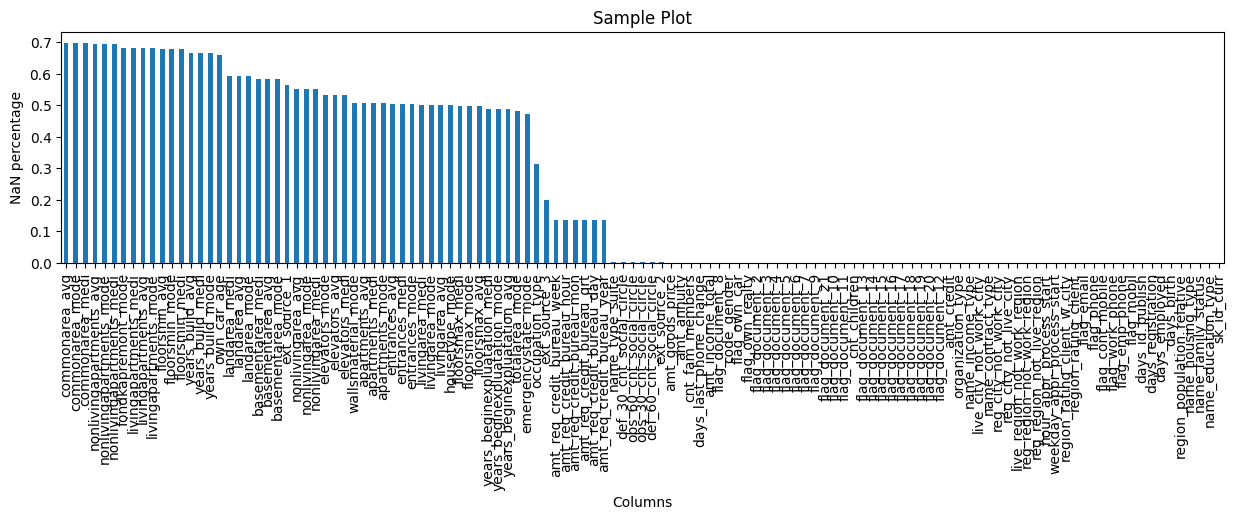

In [19]:
# TODO
# Проведите первичное изучение признаков
import matplotlib.pyplot as plt

nan_counts = X.isna().sum().sort_values(ascending=False)/df.shape[0]

plt.figure(figsize=(15, 3))
nan_counts.plot(kind='bar')

plt.xlabel('Columns')
plt.ylabel('NaN percentage')
plt.title('Sample Plot')

# Show the plot
plt.show()

В датасете много отсутвующих данных. В некоторых признаках отсутствует даже больше чем присутствует. Закодируем NaN в отдельное значение для признаков категорий и в отдельную колонку для численных признаков.

In [31]:
X.describe(include='all',percentiles=[0.5])

,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,...,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
count,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,reg oper account,block of flats,NaN,Panel,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Есть странный выброс. Стаж работы обычно отрицателен, но среднее положительное и часто встречается значение 365243 и вроде всегда у пенсионеров. Похоже, что это лучше заменить на NaN.


In [48]:
import numpy as np
# Удалим id клиента
X.drop(['sk_id_curr'],axis=1,inplace=True)

# Заменим положительный аномальный стаж на NaN
X.loc[(X.days_employed>0),'days_employed'] = np.NaN

# Признак пола содержит неск точек с неизв значением закодированном в 'XNA'. Исправим на NaN
X.loc[(X.code_gender=='XNA'),'code_gender'] = np.NaN

# Создадим признак индикатор для каждого признака с >10% отсут. данными
for column in X.select_dtypes(include=['float64','object', 'int64']):
  if X[column].isnull().sum() > X.shape[0]/10.:
    X['missing_'+ column] = ~X[column].isnull()
    print(f'Added {"missing_"+ column} feature')


Added missing_days_employed feature
Added missing_own_car_age feature
Added missing_occupation_type feature
Added missing_ext_source_1 feature
Added missing_ext_source_3 feature
Added missing_apartments_avg feature
Added missing_basementarea_avg feature
Added missing_years_beginexpluatation_avg feature
Added missing_years_build_avg feature
Added missing_commonarea_avg feature
Added missing_elevators_avg feature
Added missing_entrances_avg feature
Added missing_floorsmax_avg feature
Added missing_floorsmin_avg feature
Added missing_landarea_avg feature
Added missing_livingapartments_avg feature
Added missing_livingarea_avg feature
Added missing_nonlivingapartments_avg feature
Added missing_nonlivingarea_avg feature
Added missing_apartments_mode feature
Added missing_basementarea_mode feature
Added missing_years_beginexpluatation_mode feature
Added missing_years_build_mode feature
Added missing_commonarea_mode feature
Added missing_elevators_mode feature
Added missing_entrances_mode feat

Теперь заменим отсутствующие данные подходящими методами

In [49]:
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

# Impute numeric with median, object with most freq
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

X[num_cols] = imputer_num.fit_transform(X[num_cols])
X[cat_cols] = imputer_cat.fit_transform(X[cat_cols])

Разделим данные на train,valid и test.

In [55]:
from sklearn.model_selection import train_test_split

# Заменим признаки атегории на bool признаки для каждого значения
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)
X = X.astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)

# Подготовим StandardScaler для нормализации данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [ ]:
X_train_norm = scaler.transform(X_train)



In [71]:
temp = pd.concat([pd.DataFrame(X_train_norm,columns=X_train.columns,index=X_train.index), y_train], axis=1)
corr = temp.corr()['target']
print('Самые коррелирующие c target признаки:')
corr.abs().sort_values(ascending=False)[1:][:10]

Самые коррелирующие признаки:


ext_source_2                            0.161107
ext_source_3                            0.155703
ext_source_1                            0.098098
days_birth                              0.078090
days_employed                           0.063523
region_rating_client_w_city             0.061166
region_rating_client                    0.059165
name_income_type_Working                0.056010
code_gender_M                           0.055838
name_education_type_Higher education    0.055715
Name: target, dtype: float64


## 3. Обработка данных, обучение простой линейной модели  (5 баллов)

Изучите признаки, которые имеются в датасете.  
Какие из них относятся к каким типам?
Как они коррелируют с целевой переменной?
Обучите на ваших данных простую [Логистическую регресиию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)   
Какое качество вам удалось получить?


In [76]:
from sklearn.linear_model import LogisticRegression

X_train_norm = scaler.transform(X_train)

logistic_regression = LogisticRegression(class_weight='balanced',verbose=1, max_iter=1000,n_jobs=-1)
logistic_regression.fit(X_train_norm, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1, verbose=1)

roc_auc=0.6916835684450254


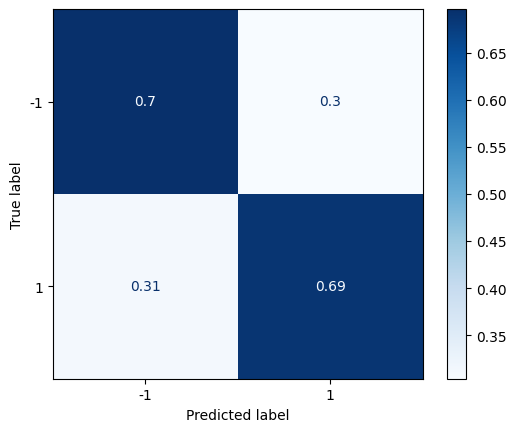

In [79]:
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay
X_valid_norm = scaler.transform(X_valid)
y_pred = logistic_regression.predict(X_valid_norm)

roc_auc = roc_auc_score(y_valid, y_pred)

print(f"{roc_auc=}")

disp = ConfusionMatrixDisplay.from_estimator(logistic_regression, X_valid_norm, y_valid,
        display_labels=[-1,1], cmap=plt.cm.Blues, normalize='true')

## 4. Оценка поведения модели в зависимости от гиперпараметров  (5 баллов)

Попробуйте поперебирать значения гиперпараметров `l2_coef, batch_size`.   
Какая их комбинация выглядит оптимальной?




In [81]:
# Таких параметров у LogisticRegression нет, поэтому анализировала другие, соответствующие.

# при дефолтном кол-ве итераций max_iter = 100 модель не сходилась (Failed to converge) и вручную подобрано max_iter=1000
# Еще я перебирала l1 и l2 регуляризацию, но они требуют разных решателей (saga и lbfgs соответсвенно), поэтому я просто меняла код каждый раз

# Лучшее сочетание: l2 регуляризация, solver=lbfgs,

In [82]:
logistic_regression = LogisticRegression(class_weight='balanced',verbose=1, max_iter=1000,n_jobs=-1, C=0.1)
logistic_regression.fit(X_train_norm, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, n_jobs=-1,
                   verbose=1)


## 5. GridSearchCV. Отбор признаков  (5 баллов)


С помощью GridSearchCV подберите оптимальные параметры `step_alpha, step_beta` для фиксированных значений `l2_coef, batch_size` с предыдущего шага.  
Проведите отбор признаков любым из известных вам методов

In [ ]:
# TODO
# Подберите гиперпараметры step_alpha, step_beta для фиксированных l2_coef, batch_size
# Проведите отбор признаков

In [80]:
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression(class_weight='balanced',verbose=1, max_iter=1000,n_jobs=-1)

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Values for the regularization strength (C)
}

# Create a GridSearchCV object with cross-validation (e.g., 5-fold)
grid_search = GridSearchCV(logistic_regression, param_grid, cv=2, scoring='roc_auc',verbose=1,error_score='raise')

# Fit the grid search to your data
grid_search.fit(X_train_norm, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']

print("Best C:", best_C)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best C: 0.1



## 6. Оценка качества модели  (5 баллов)


Оцените качество модели с помощью известных вам метрик классификации.  
Что ещё в модели можно было бы улучшить?


ROC AUC: 0.6835149977698484


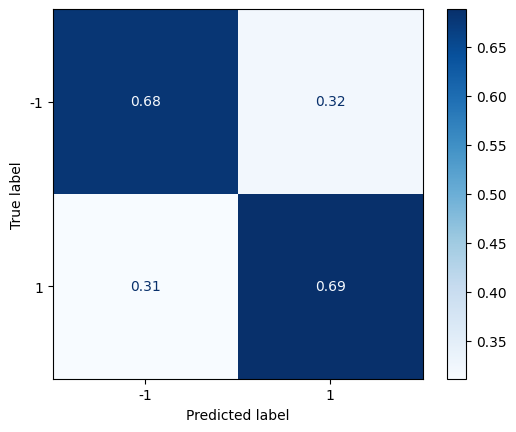

In [84]:
# TODO
# Оцените качество модели с помощью известных вам метрик

from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay
X_test_norm = scaler.transform(X_test)
y_pred = logistic_regression.predict(X_test_norm)

roc_auc = roc_auc_score(y_test, y_pred)

print(f"ROC AUC: {roc_auc}")

disp = ConfusionMatrixDisplay.from_estimator(
        logistic_regression,
        X_test_norm,
        y_test,
        display_labels=[-1,1],
        cmap=plt.cm.Blues,
        normalize='true',
    )

Модель выдает 0.68 ROC AUC. Это метрика, которая использовалась в Kaggle соревновании и хорошо подходит для несбалансированных данных. Лучший результат на Kaggle равен 0.805 ROC AUC. Случайный классификатор имеет 0.5 ROC AUC.